In [3]:
%matplotlib notebook
import sys
sys.path.append("../")
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import system
import logging
reload(system)
reload(logging)
import pickle
import networkx as nx

In [120]:
system._MATCHER = "MIP"
system._PROD_SURPLUS = True
system.LOG_DEMAND = True
system.logger.setLevel(logging.INFO)
sys = system.System()
sys.zones_dict = {0:0,1:1}

#producers

#node 0

idx = 0
prod = system.ProductionAgent(sys, idx, 1000, 20)
prod.node = 0
sys.producers.append(prod)

idx += 1
prod = system.ProductionAgent(sys, idx, 400, 25)
prod.node = 0
sys.producers.append(prod)

idx += 1
prod = system.ProductionAgent(sys, idx, 100, 35)
prod.node = 0
sys.producers.append(prod)

idx += 1
prod = system.ProductionAgent(sys, idx, 500, 50)
prod.node = 0
prod.minRunFactor = 0
prod.initRegulationFactor = 1
sys.producers.append(prod)

# node 1


idx += 1
prod = system.ProductionAgent(sys, idx, 100, 65)
prod.node = 1
prod.minRunFactor = 0
prod.initRegulationFactor = 1
prod.regulationUpdateFactor = 1
sys.producers.append(prod)

idx += 1
prod = system.ProductionAgent(sys, idx, 100, 1000)
prod.node = 1
prod.minRunFactor = 0
prod.initRegulationFactor = 1
prod.regulationUpdateFactor = 1
sys.producers.append(prod)

idx += 1
prod = system.ProductionAgent(sys, idx, 100, 1000)
prod.node = 1
prod.minRunFactor = 0
prod.initRegulationFactor = 1
prod.regulationUpdateFactor = 1
sys.producers.append(prod)


idx += 1
prod = system.ProductionAgent(sys, idx, 1000, 1000)
prod.node = 1
prod.minRunFactor = 0
prod.partOfSpot = False
prod.initRegulationFactor = 1
#prod.debug_level = 1
sys.producers.append(prod)


#consumers
# node 0
users = []
normal = system.DemandAgent(sys, 600*1000, 500*1000, t0=0, isOptimizer=False)
users.append(normal)
normal.node = 0

optimizer = system.DemandAgent(sys, 100*1000, 80*1000, t0=0, isOptimizer=True) 
users.append(optimizer)
optimizer.node = 0
sys.users.extend(users)

util = system.UtilityAgent(sys, users, 0)
util.name = "0"
util.node = 0
sys.utilities.append(util)

# node 1

users = []
normal = system.DemandAgent(sys, 600*1000, 500*1000, t0=0, isOptimizer=False)
users.append(normal)
normal.node = 1

optimizer = system.DemandAgent(sys, 200*1000, 105*1000, t0=0, isOptimizer=True) 
users.append(optimizer)
optimizer.node = 1
sys.users.extend(users)

util = system.UtilityAgent(sys, users, 1)
util.name = "1"
util.node = 1
sys.utilities.append(util)

network = nx.Graph()
network.add_nodes_from([0,1])
network.add_edge(0,1,limit=710)

sys.network = network
for u in sys.users:
    
    if u.isOptimizer:
        u._isRemote = False
    print(u.isOptimizer, u.isRemote,u.node)
#comment

False False 0
True False 0
False False 1
True False 1


In [123]:
sys.runForDays(10)

day 0
day 0
MIP welfare: 96089140.33715948
MIP welfare: 96089140.33715948
profile set to 0 for 0
profile set to 0 for 0
profile set to 0 for 1
profile set to 0 for 1
...done
...done
day 1
day 1
MIP welfare: 96008068.21862902
MIP welfare: 96008068.21862902
profile set to 0 for 0
profile set to 0 for 0
profile set to 0 for 1
profile set to 0 for 1
...done
...done
day 2
day 2
MIP welfare: 95974539.22830094
MIP welfare: 95974539.22830094
profile set to 0 for 0
profile set to 0 for 0
profile set to 0 for 1
profile set to 0 for 1
...done
...done
day 3
day 3
MIP welfare: 95885093.93241945
MIP welfare: 95885093.93241945
profile set to 0 for 0
profile set to 0 for 0
profile set to 0 for 1
profile set to 0 for 1
...done
...done
day 4
day 4
MIP welfare: 95917037.6394937
MIP welfare: 95917037.6394937
profile set to 0 for 0
profile set to 0 for 0
profile set to 0 for 1
profile set to 0 for 1
...done
...done
day 5
day 5
MIP welfare: 95952357.18817559
MIP welfare: 95952357.18817559
profile set to 0 f

<IPython.core.display.Javascript object>


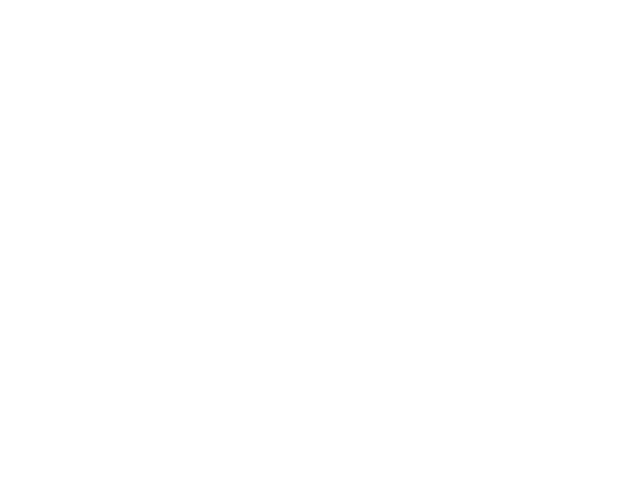

IndexError: list index out of range

In [125]:
plt.figure()
for pos in range(10):
    x = np.arange(pos*24,(pos+1)*24)
    plt.plot(x,sys._spotPriceHistory[sys.daysRun-pos][0],'g')
    plt.plot(x,sys._spotPriceHistory[sys.daysRun-pos][1],'r')
    #plt.plot(x,sys._spotPriceHistory[pos]["sys"],'k')
plt.ylim((0,220))

In [129]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

<IPython.core.display.Javascript object>


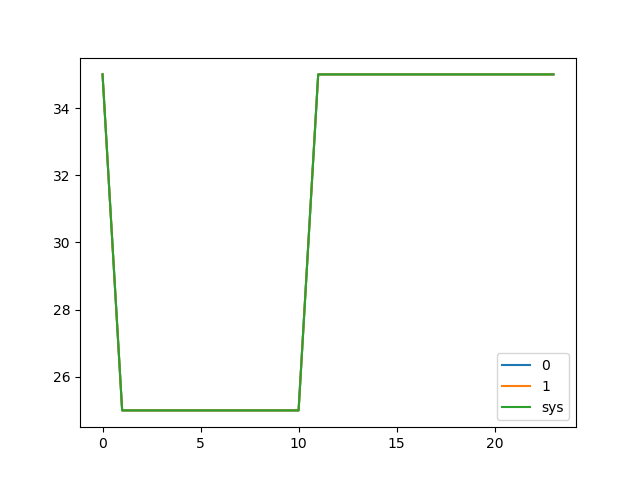

In [75]:
pos = 5
plt.figure()
plt.plot(sys._spotPriceHistory[pos][0],label='0')
plt.plot(sys._spotPriceHistory[pos][1],label='1')
plt.plot(sys._spotPriceHistory[pos]["sys"],label='sys')
plt.legend()


<IPython.core.display.Javascript object>


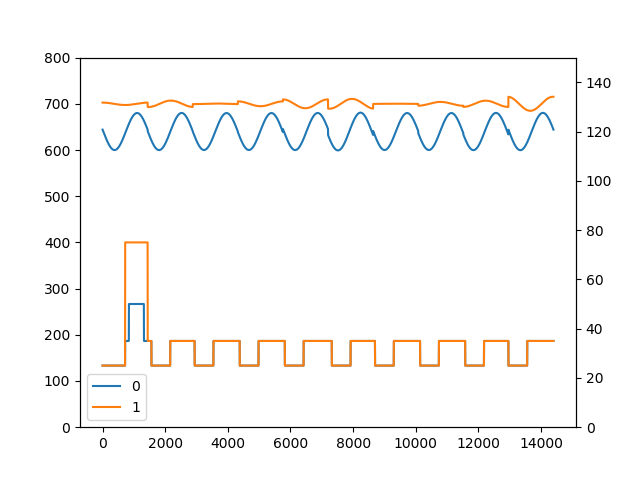

(0, 150)

In [38]:
consumption = {}
for u in sys.users:
    if u.node in consumption:
        consumption[u.node] += np.concatenate(u._usage_all)/1000
    else:
        consumption[u.node] = np.concatenate(u._usage_all)/1000

plt.figure()
plt.plot(consumption[0],label="0")
plt.plot(consumption[1],label="1")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(np.repeat(np.concatenate([sys._spotPriceHistory[pos][0] for pos in range(10)]),60))
ax2.plot(np.repeat(np.concatenate([sys._spotPriceHistory[pos][1] for pos in range(10)]),60))

ax1.legend()
ax1.set_ylim([0,800])
ax2.set_ylim([0,150])